# Wstęp do Machine Learning - praca domowa

## Zbior german credit data

### Wczytanie pakietów

In [237]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", 101) ## to pomoże nam przy metodzie head zobaczyć wszystkie kolumny
plt.rcParams["figure.figsize"] = (20,3)

### Eksploracja

#### Wczytanie zbioru danych

In [238]:
df = pd.read_csv('german_credit_data.csv')

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [239]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [241]:
print(df.shape)

(1000, 10)


In [242]:

df[['Age', 'Credit amount', 'Duration']].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [243]:

df.value_counts()

Unnamed: 0  Age  Sex     Job  Housing  Saving accounts  Checking account  Credit amount  Duration  Purpose            
1           22   female  2    own      little           moderate          5951           48        radio/TV               1
677         24   male    2    own      moderate         moderate          5595           72        radio/TV               1
668         43   male    2    rent     little           little            4843           12        car                    1
666         34   male    2    own      rich             moderate          3496           30        furniture/equipment    1
664         50   female  1    own      little           rich              1047           6         education              1
                                                                                                                         ..
321         32   male    2    own      little           little            1938           24        radio/TV               1
320         2

#### Sprawdzenie udziału poszczególnych kategorii - zadanie samodzielne


### Wykresy
1. Pudełko
2. Histogram

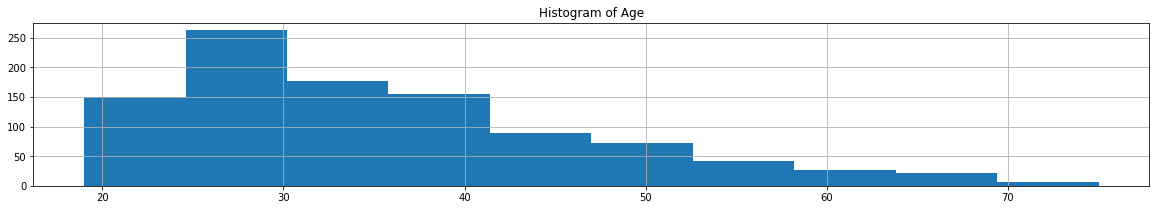

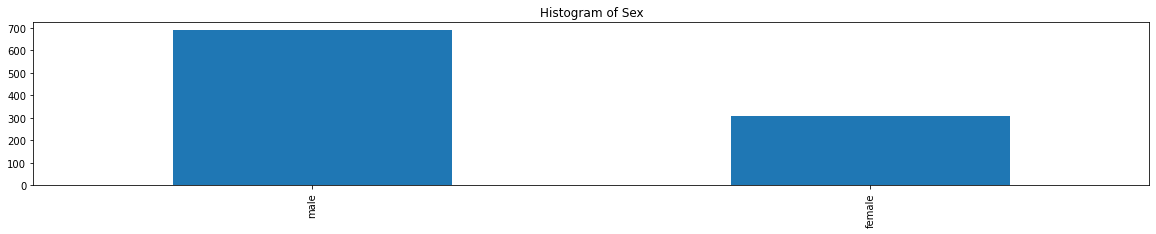

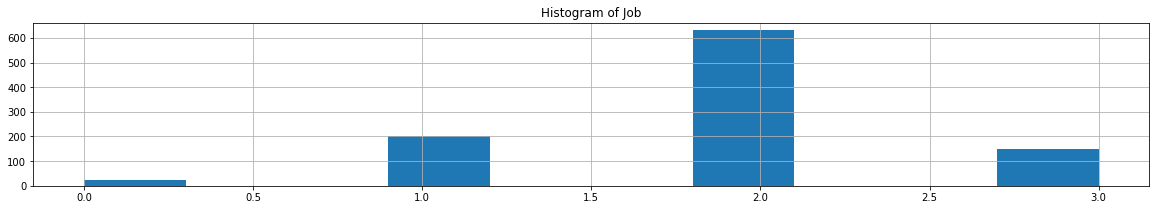

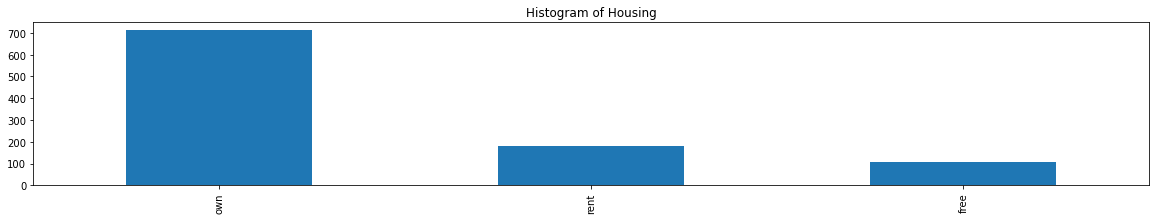

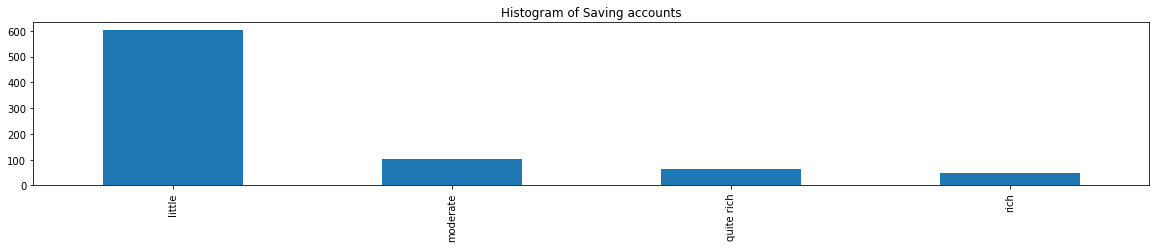

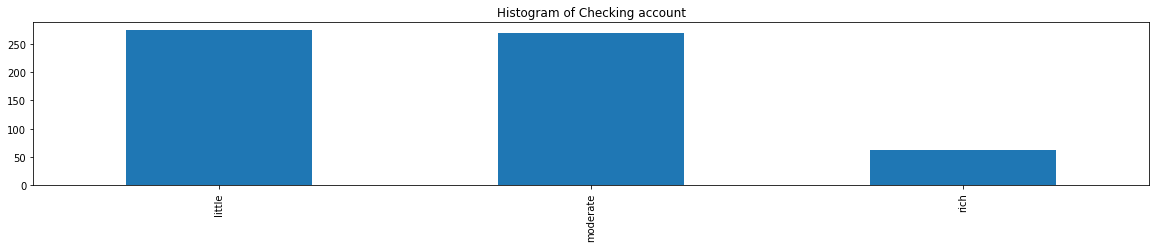

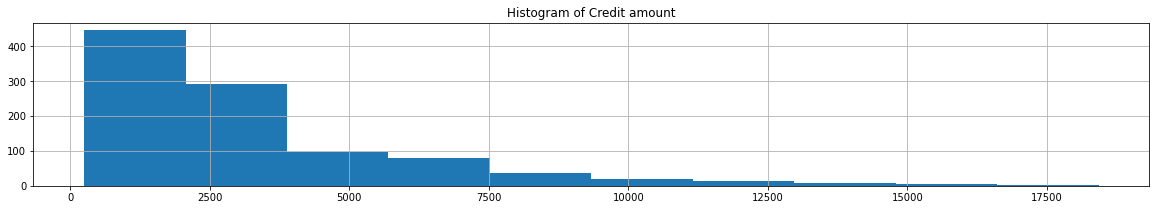

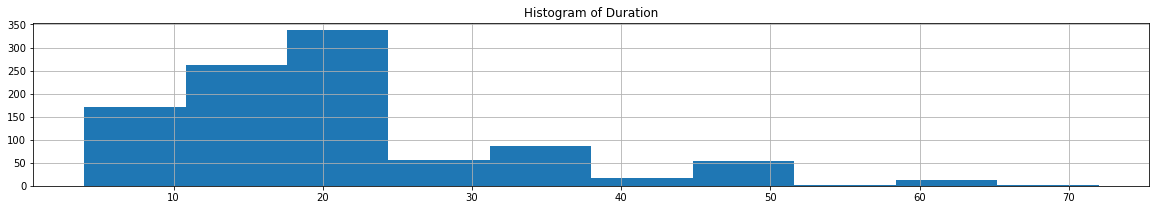

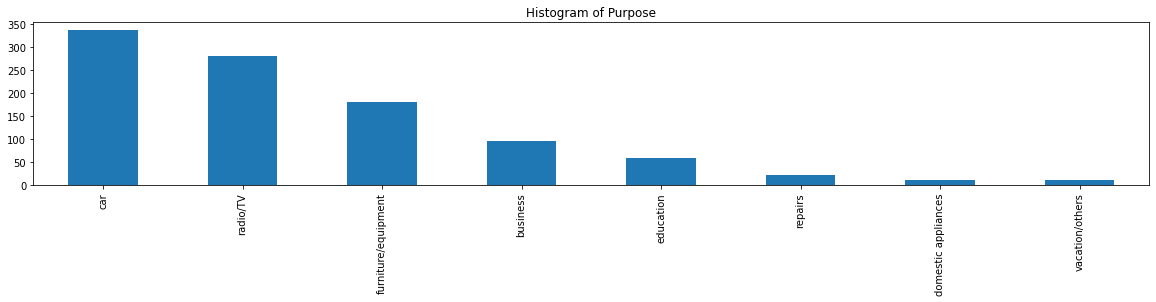

In [244]:
cat_df = ["Age",  "Sex", "Job",  "Housing",  "Saving accounts",  'Checking account',  "Credit amount",  "Duration",  "Purpose"]
df_cleaned = df[cat_df]
for col_name in cat_df:
    if df_cleaned[col_name].dtype == type(object):
        df_cleaned[col_name].value_counts().plot(kind='bar')
    else:
        df_cleaned.hist(col_name)

    plt.title(f'Histogram of {col_name}')
    plt.show()

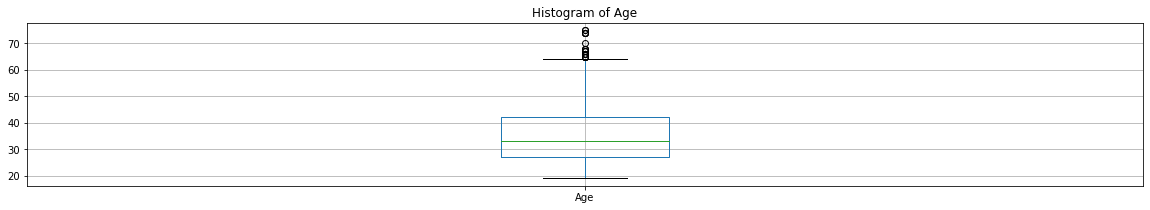

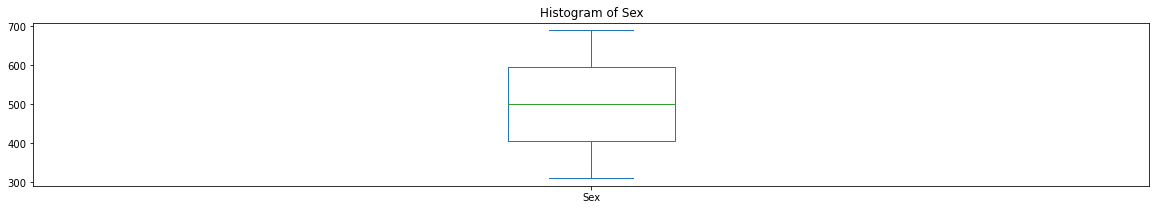

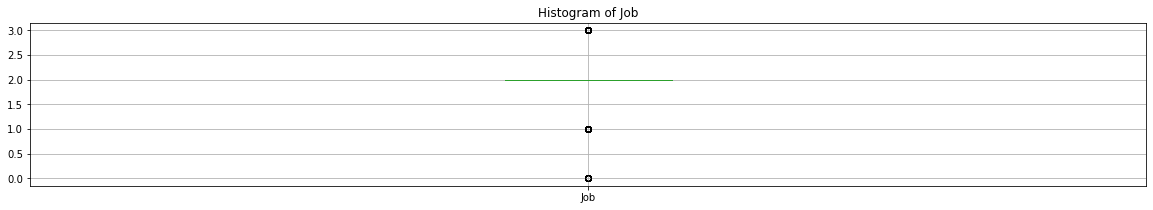

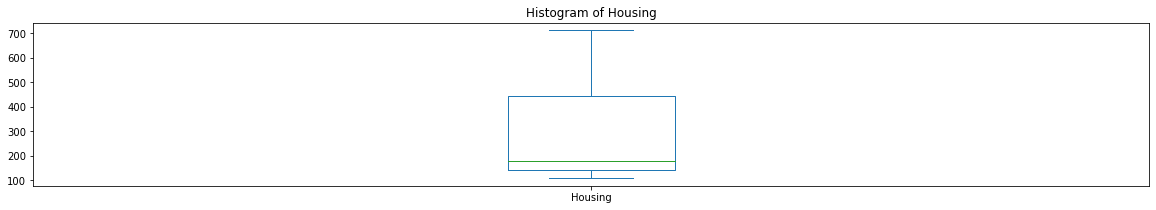

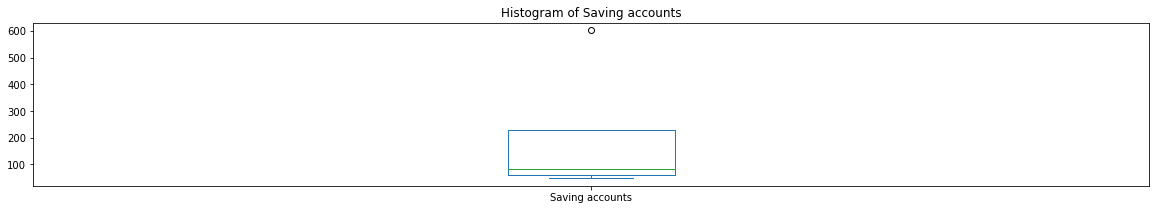

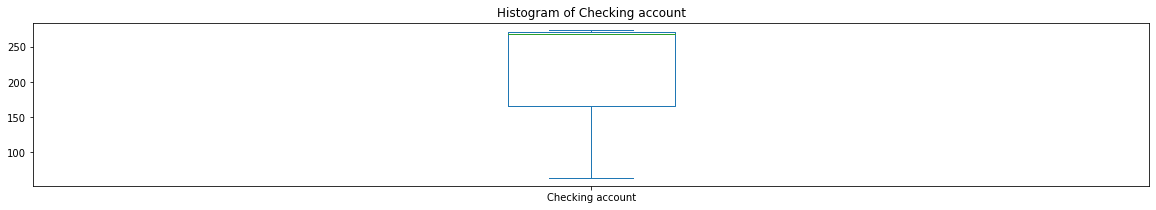

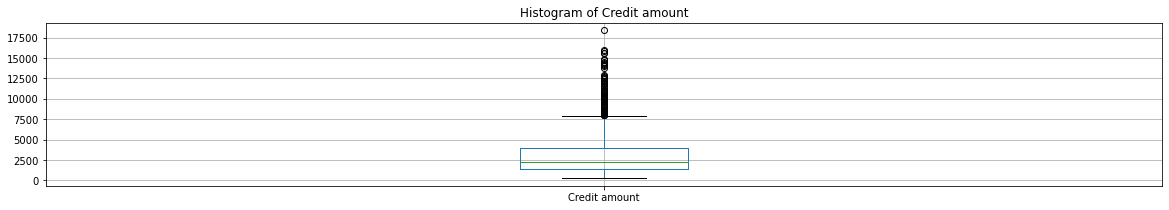

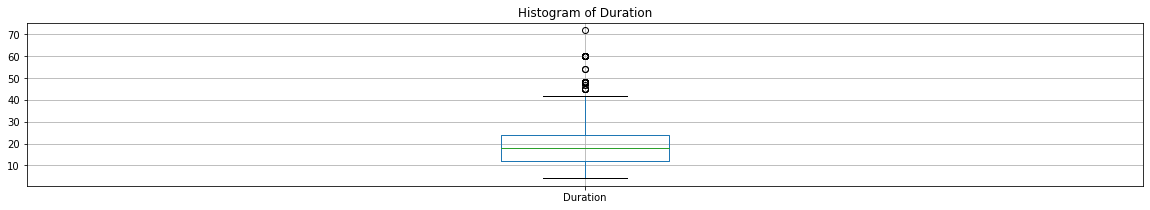

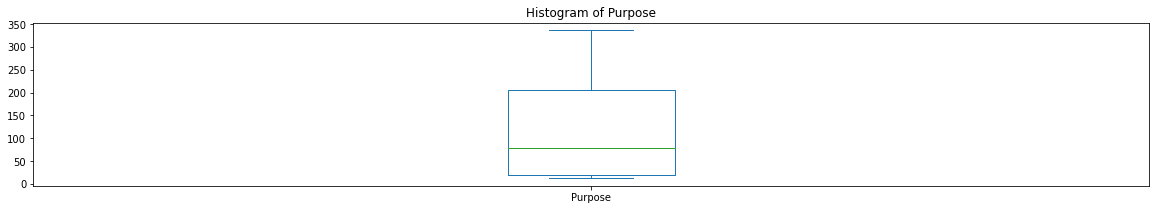

In [245]:
for col_name in cat_df:
    if df_cleaned[col_name].dtype == type(object):
        df_cleaned[col_name].value_counts().plot(kind='box')
    else:
        df_cleaned.boxplot(col_name)

    plt.title(f'Histogram of {col_name}')
    plt.show()

#### Sprawdzenie braków danych

In [246]:

df_cleaned_no_na = df_cleaned.dropna()
df_cleaned_no_na.isna()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
989,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


#### Korelacja

In [247]:
df_cleaned_no_na[['Age',	'Credit amount', 'Duration']].corr()


,Age,Credit amount,Duration
Age,1.000000,0.082014,0.001549
Credit amount,0.082014,1.000000,0.613298
Duration,0.001549,0.613298,1.000000


### Feature Engineering
#### Stworzenie zmiennych 0-1 dla kategorii lub labelencodera
Użycie funkcji z pandas get_dummies() lub labelencoder()

In [248]:
df_standardised = pd.get_dummies(df_cleaned_no_na, columns=['Sex',	'Housing', 'Saving accounts',	'Checking account', 'Duration', 'Purpose'])
df_standardised.head()

,Age,Job,Credit amount,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Duration_6,Duration_7,Duration_8,Duration_9,Duration_10,Duration_11,Duration_12,Duration_13,Duration_14,Duration_15,Duration_16,Duration_18,Duration_20,Duration_21,Duration_24,Duration_26,Duration_27,Duration_28,Duration_30,Duration_33,Duration_36,Duration_39,Duration_40,Duration_42,Duration_45,Duration_47,Duration_48,Duration_54,Duration_60,Duration_72,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,2,5951,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,45,2,7882,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,35,3,6948,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,28,3,5234,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [249]:
columns=['Sex',	'Housing', 'Saving accounts', 'Job', 'Checking account', 'Purpose']
df_standardised2 = df_cleaned_no_na
le = LabelEncoder() # odwrocic proces mozna za pomoca le.inverse_transform
for col in columns:
    le.fit(df_standardised2[col])
    print(col, le.classes_)
    df_standardised2[col] = le.transform(df_standardised2[col])

print(df_standardised2.head())

Sex ['female' 'male']
Housing ['free' 'own' 'rent']
Saving accounts ['little' 'moderate' 'quite rich' 'rich']
Job [0 1 2 3]
Checking account ['little' 'moderate' 'rich']
Purpose ['business' 'car' 'domestic appliances' 'education' 'furniture/equipment'
 'radio/TV' 'repairs' 'vacation/others']
   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
1   22    0    2        1                0                 1           5951   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   
7   35    1    3        2                0                 1           6948   
9   28    1    3        1                0                 1           5234   

   Duration  Purpose  
1        48        5  
3        42        4  
4        24        1  
7        36        1  
9        30        1  


C:\Users\AMD\AppData\Local\Temp/ipykernel_2760/3480531325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standardised2[col] = le.transform(df_standardised2[col])


#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

In [250]:
# Duration ma tendencje jednoznacznie rosnace wzgledem kolumny  credit amount

### Przygotowanie zbioru
#### Podział zbioru na treningowy i testowy

#### Standaryzacja

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # funkcja obliczająca metrykę
from sklearn.preprocessing import LabelEncoder # funkcja do kodowania etykiet na liczby całkowite

le = LabelEncoder()
df_ml = df_cleaned_no_na
for col in df_cleaned_no_na.columns:
    if df_ml[col].dtype == df['Sex'].dtype and col != 'Purpose':
        le.fit(df_ml[col])


        df_ml[col] = le.transform(df_ml[col])
    
df_ml = (df_ml - df_ml.min()) / (df_ml.max() - df_ml.min())
df_ml.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,0.053571,0.0,0.666667,0.5,0.0,0.5,0.312707,0.636364,0.714286
3,0.464286,1.0,0.666667,0.0,0.0,0.0,0.419110,0.545455,0.571429
4,0.607143,1.0,0.666667,0.0,0.0,0.0,0.253141,0.272727,0.142857
7,0.285714,1.0,1.000000,1.0,0.0,0.5,0.367644,0.454545,0.142857
9,0.160714,1.0,1.000000,0.5,0.0,0.5,0.273198,0.363636,0.142857


#### Analiza głównych składowych

In [252]:
df_ml.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.283730,0.678161,0.625160,0.541188,0.114304,0.316092,0.165459,0.232410,0.411604
std,0.210499,0.467630,0.227604,0.285156,0.253623,0.330314,0.161404,0.189001,0.284934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.000000,0.666667,0.500000,0.000000,0.000000,0.056287,0.090909,0.142857
50%,0.223214,1.000000,0.666667,0.500000,0.000000,0.500000,0.112988,0.181818,0.571429
75%,0.392857,1.000000,0.666667,0.500000,0.000000,0.500000,0.203617,0.314394,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Estymacja modelu klasyfikacyjnego

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [254]:

X = df_ml[[col for col in df_ml.columns if col != 'Purpose']].to_numpy()
y = df_cleaned_no_na['Purpose'].to_numpy()
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [255]:
cl = DecisionTreeClassifier()
cl.fit(train_X, train_y)


DecisionTreeClassifier()

### Ocena jakości modelu klasyfikacyjnego

In [256]:
predictions = cl.predict(test_X)
predictions
mse = np.sqrt(mean_squared_error(test_y, predictions))
print('MSE', mse)
correct = 0
for index, p in enumerate(predictions):
    if p == test_y[index]:
        correct += 1

accuracy = correct / len(test_y)
print(f'Accuracy: {accuracy:.8f}')

MSE 2.762894819977688
Accuracy: 0.31297710
